In [27]:
from pathlib import Path
import pandas as pd
import numpy as np
import json

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np

In [88]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [120]:
# Define the figure size and dpi
fig_width = 6.9  # inches
fig_height = 3.5  # inches
fig_dpi = 350

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,

    # Fonts
    'font.size': 18,

    # Axes
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'axes.linewidth': 1,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 1,
    'grid.color': 'gray',

    # Legend
    'legend.fontsize': 8,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,

    # Lines
    'lines.linewidth': 2.0,
    'lines.markersize': 2,
    'axes.labelsize': 10,
    'axes.titlesize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
})

In [116]:
models = list(Path("/export/usuarios_ml4ds/lbartolome/Repos/intelcomp_repos/topicmodeler/scalability/scalability_models").iterdir())

In [3]:
model_path = models[-1]
with model_path.joinpath("stats/tuned_params.json").open("r") as f:
    config = json.load(f)
print(config)

{'trainer': 'prodLDA', 'n_components': 300, 'num_samples': 20, 'num_epochs': 10, 'model_type': 'prodLDA'}


In [157]:
def get_model_desc(model_path):
    """Loads model configuration"""
    with model_path.joinpath("stats/tuned_params.json").open("r") as f:
        model_desc = json.load(f)
    return model_desc

def get_model_memory(model_path):
    """Loads model memory consumption"""
    model_stats = model_path.joinpath("stats")
    mem_use = pd.read_csv(model_stats.joinpath("mem_use.txt"))
    time = len(mem_use)
    return mem_use, time

def get_model_coherence(model_path):
    """Loads model coherence measures"""
    model_stats = model_path.joinpath("stats")
    with model_stats.joinpath("topic_coherence.json").open("r") as f:
        coherences = json.load(f)
    return coherences

def get_model_info(model_path: Path):
    """Obtain all necessary information of the model"""
    # Get parameters
    model_desc = get_model_desc(model_path)
    mem_proc, time = get_model_memory(model_path)
    #coherences = get_model_coherence(model_path)

    info = {
        "model_desc": model_desc,
        "mem_proc": mem_proc,
        "time": time
        #"coherences": coherences,
    }
    return info

In [130]:
number_topics = [5, 10, 15, 20, 30, 50, 75, 100, 150, 300]
datasets_names = [
        "s2cs_01",
        "s2cs_03",
        "s2cs_1",
        #"s2cs_3",
        #"s2cs_emb_lemmas_embeddings"
]
samples = [1,3,10,30]

infos = []
ntopics = 10
sample = "s2cs_1"
for model in models:
    try:
        if model.name.startswith(sample):
            info = get_model_info(model)
            if "ntopics" in info["model_desc"].keys():
                if info["model_desc"]['ntopics'] == ntopics:
                    print(model.name)
                    infos.append(info)
            elif "n_components" in info["model_desc"].keys():
                if info["model_desc"]['n_components'] == ntopics:
                    print(model.name)
                    infos.append(info)
    except Exception as e:
        print(e)
        pass

s2cs_1_mallet_10_1000_8_20240416
s2cs_1_bertopic_10_20240504
s2cs_1_ctm_10_20_10_prodLDA_CombinedTM_20240417
s2cs_1_ctm_10_20_10_prodLDA_CombinedTM_20240503
s2cs_1_prodLDA_10_20_10_prodLDA_20240416
s2cs_1_mallet_10_1000_8_20240501
s2cs_1_prodLDA_10_20_10_prodLDA_20240502


In [131]:
names = [info["model_desc"]['trainer'] for info in infos]

first_occurrence_indices = {}
for index, name in enumerate(names):
    if name not in first_occurrence_indices:
        first_occurrence_indices[name] = index

indices = list(first_occurrence_indices.values())
infos = [infos[index] for index in indices]
[print(info["model_desc"]['trainer']) for info in infos]

mallet
bertopic
ctm
prodLDA


[None, None, None, None]

In [ ]:
plt.rcParams.update({'font.size': 18, 'axes.labelsize': 14, 'axes.titlesize': 14})

number_topics = [5] #, 10, 15, 20, 30, 50, 75, 100, 150, 300]
datasets_names = [
        "s2cs_01",
        #"s2cs_03",
        #"s2cs_1",
        #"s2cs_3",
        #"s2cs_emb_lemmas_embeddings"
]
samples = [1]#,3,10,30]

for sample, dtset in zip(samples, datasets_names):
    for ntopics in number_topics:
        print(f"Sample {sample}, ntopics {ntopics}")
        infos = []
        for model in models:
            try:
                if model.name.startswith(dtset):
                    info = get_model_info(model)
                    if "ntopics" in info["model_desc"].keys():
                        if info["model_desc"]['ntopics'] == ntopics:
                            print(model.name)
                            infos.append(info)
                    elif "n_components" in info["model_desc"].keys():
                        if info["model_desc"]['n_components'] == ntopics:
                            print(model.name)
                            infos.append(info)
            except Exception as e:
                print(e)
                pass

        names = [info["model_desc"]['trainer'] for info in infos]
        
        first_occurrence_indices = {}
        for index, name in enumerate(names):
            if name not in first_occurrence_indices:
                first_occurrence_indices[name] = index

        indices = list(first_occurrence_indices.values())
        infos = [infos[index] for index in indices]
        [print(info["model_desc"]['trainer']) for info in infos]

        # Define the desired order of trainers
        order = ["mallet", "prodLDA", "ctm", "bertopic"]
        # Sort the infos list based on the order
        infos.sort(key=lambda x: order.index(x["model_desc"]['trainer']))

        num_models = len(infos)
        fig, axs = plt.subplots(num_models, 2, figsize=(16, 5 * num_models), squeeze=False)
        
        # Add main figure title
        #fig.suptitle("Figure title", fontsize=16, fontweight='bold')

        for i, model in enumerate(infos):
            desc = model['model_desc']
            mem_proc = model['mem_proc']
            seconds = np.arange(len(mem_proc))

            subfigure_title = f"Subfigure title {i + 1}"
            if desc['trainer'] == "mallet":
                trainer_title = "Mallet"
            elif desc['trainer'] == "bertopic":
                trainer_title = "BERTopic"
            elif desc['trainer'] == "ctm":
                trainer_title = "CTM"
            else:
                trainer_title = desc['trainer']

            # RSS and VMS in the same plot
            ax = axs[i, 0]
            ax.plot(seconds, mem_proc['rss'] / 1024, color='tomato', label="RAM memory")
            ax.plot(seconds, mem_proc['vms'] / 1024, color='dodgerblue', label="Virtual memory")
            ax.set_xlabel("Seconds")
            ax.set_ylabel("Memory Used (GB)")
            ax.legend(loc='upper right')
            ax.grid(True)
            ax.set_title(f"{trainer_title} - RAM/Virtual memory usage", loc='center')

            # CPU and GPU (if available) in the same plot
            ax = axs[i, 1]
            ax.plot(seconds, [el/100 for el in mem_proc["cpu"].values.tolist()], color='seagreen', label="CPU Usage")
            if 'gpu_memory' in mem_proc.columns and 'gpu' in mem_proc.columns:
                ax2 = ax.twinx()  # instantiate a second y-axis
                #ax2.plot(seconds, mem_proc['gpu_memory'] / 1024, color='orchid', label="GPU Memory (GB)")
                #ax2.set_ylabel("GPU Memory (GB)")
                #ax2.legend(loc='upper left')

                ax2.plot(seconds, mem_proc['gpu'], color='steelblue', label="GPU Usage (%)")
                ax2.legend(loc='upper right')
            ax.set_xlabel("Seconds")
            ax.set_ylabel("Number of CPUs")
            ax.grid(True)
            if trainer_title == "Mallet" or trainer_title == "BERTopic":
                ax.set_title(f"{trainer_title} - CPU Usage", loc='center')
            else:
                ax.set_title(f"{trainer_title} - CPU/GPU Usage", loc='center')

        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make room for the main title
        plt.savefig(f"/export/usuarios_ml4ds/lbartolome/Repos/intelcomp_repos/topicmodeler/scalability/figures/stats_{sample}_{ntopics}topics.png")
        plt.show()

Sample 1, ntopics 5
s2cs_01_ctm_5_20_10_prodLDA_CombinedTM_20240430
s2cs_01_mallet_5_1000_8_20240430
s2cs_01_ctm_5_20_10_prodLDA_CombinedTM_20240415
s2cs_01_mallet_5_1000_8_20240415
s2cs_01_prodLDA_5_20_10_prodLDA_20240430
s2cs_01_bertopic_5_20240430
s2cs_01_prodLDA_5_20_10_prodLDA_20240415
s2cs_01_bertopic_5_20240415
ctm
mallet
prodLDA
bertopic


In [169]:
number_topics = [5, 10, 15, 20, 30, 50, 75, 100, 150, 300]
datasets_names = [
        "s2cs_01",
        "s2cs_03",
        "s2cs_1",
        "s2cs_3",
        #"s2cs_emb_lemmas_embeddings"
]
samples = [1,3,10,30]

all_infos = []
for sample, dtset in zip(samples,datasets_names):
    for ntopics in number_topics:
        
        infos = []
        for model in models:
            try:
                if model.name.startswith(dtset):
                    info = get_model_info(model)
                    if "ntopics" in info["model_desc"].keys():
                        if info["model_desc"]['ntopics'] == ntopics:
                            infos.append(
                                [
                                    sample,
                                    dtset,
                                    model.name,
                                    info["model_desc"]['trainer'],
                                    info["model_desc"]['ntopics'],
                                    info["time"]

                                ]
                            )
                    elif "n_components" in info["model_desc"].keys():
                        if info["model_desc"]['n_components'] == ntopics:
                            infos.append(
                                [
                                    sample,
                                    dtset,
                                    model.name,
                                    info["model_desc"]['trainer'],
                                    info["model_desc"]['n_components'],
                                    info["time"]

                                ]
                            )
            except Exception as e:
                print(e)
                pass

        names = [info[3] for info in infos]

        first_occurrence_indices = {}
        for index, name in enumerate(names):
            if name not in first_occurrence_indices:
                first_occurrence_indices[name] = index

        indices = list(first_occurrence_indices.values())
        infos = [infos[index] for index in indices]
        all_infos.extend(infos)

In [170]:
columns = ['Sampling rate', 'dtset', 'model_name', 'trainer', 'nr_topics', 'tr_time']

# Create the DataFrame
df = pd.DataFrame(all_infos, columns=columns)
df

,Sampling rate,dtset,model_name,trainer,nr_topics,tr_time
0,1,s2cs_01,s2cs_01_ctm_5_20_10_prodLDA_CombinedTM_20240430,ctm,5,621
1,1,s2cs_01,s2cs_01_mallet_5_1000_8_20240430,mallet,5,400
2,1,s2cs_01,s2cs_01_prodLDA_5_20_10_prodLDA_20240430,prodLDA,5,289
3,1,s2cs_01,s2cs_01_bertopic_5_20240430,bertopic,5,182
4,1,s2cs_01,s2cs_01_prodLDA_10_20_10_prodLDA_20240430,prodLDA,10,240
...,...,...,...,...,...,...
136,30,s2cs_3,s2cs_3_prodLDA_100_20_10_prodLDA_20240517,prodLDA,100,10123
137,30,s2cs_3,s2cs_3_mallet_150_1000_8_20240516,mallet,150,12692
138,30,s2cs_3,s2cs_3_prodLDA_150_20_10_prodLDA_20240517,prodLDA,150,7453
139,30,s2cs_3,s2cs_3_mallet_300_1000_8_20240516,mallet,300,16014


In [207]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Adjusting font size for better readability
plt.rcParams.update({'font.size': 18, 'axes.labelsize': 14, 'axes.titlesize': 14})

# Plotting the average training time vs sampling rate per model type (trainer)
for trainer in df['trainer'].unique():
    subset = df[df['trainer'] == trainer]
    avg_tr_time_sampling_rate = subset.groupby('Sampling rate')['tr_time'].mean()
    axs[0].plot(avg_tr_time_sampling_rate.index, avg_tr_time_sampling_rate,
                marker='o', markersize=10, linestyle='-', label=trainer)

axs[0].set_xlabel('Sampling rate (%)')
axs[0].set_ylabel('Training Time (s)')
axs[0].set_title('Training Time vs Sampling Rate')
axs[0].set_xticks(sorted(df['Sampling rate'].unique()))
axs[0].tick_params(axis='x')
axs[0].legend(title='Trainer')
axs[0].grid(True)

# Plotting the average training time vs number of topics per model type (trainer)
for trainer in df['trainer'].unique():
    subset = df[df['trainer'] == trainer]
    avg_tr_time_nr_topics = subset.groupby('nr_topics')['tr_time'].mean()
    axs[1].plot(avg_tr_time_nr_topics.index, avg_tr_time_nr_topics,
                marker='o', markersize=10, linestyle='-', label=trainer)

axs[1].set_xlabel('Number of Topics')
axs[1].set_ylabel('Training Time (s)')
axs[1].set_title('Training Time vs Number of Topics')
axs[1].set_xticks(sorted(df['nr_topics'].unique())[::2] + [300])  # Show every other label to reduce clutter
axs[1].tick_params(axis='x')
axs[1].legend(title='Trainer')
axs[1].grid(True)

plt.tight_layout()
plt.savefig('/export/usuarios_ml4ds/lbartolome/Repos/intelcomp_repos/topicmodeler/scalability/figures/time_vs_sampling_topics.png')
plt.show()

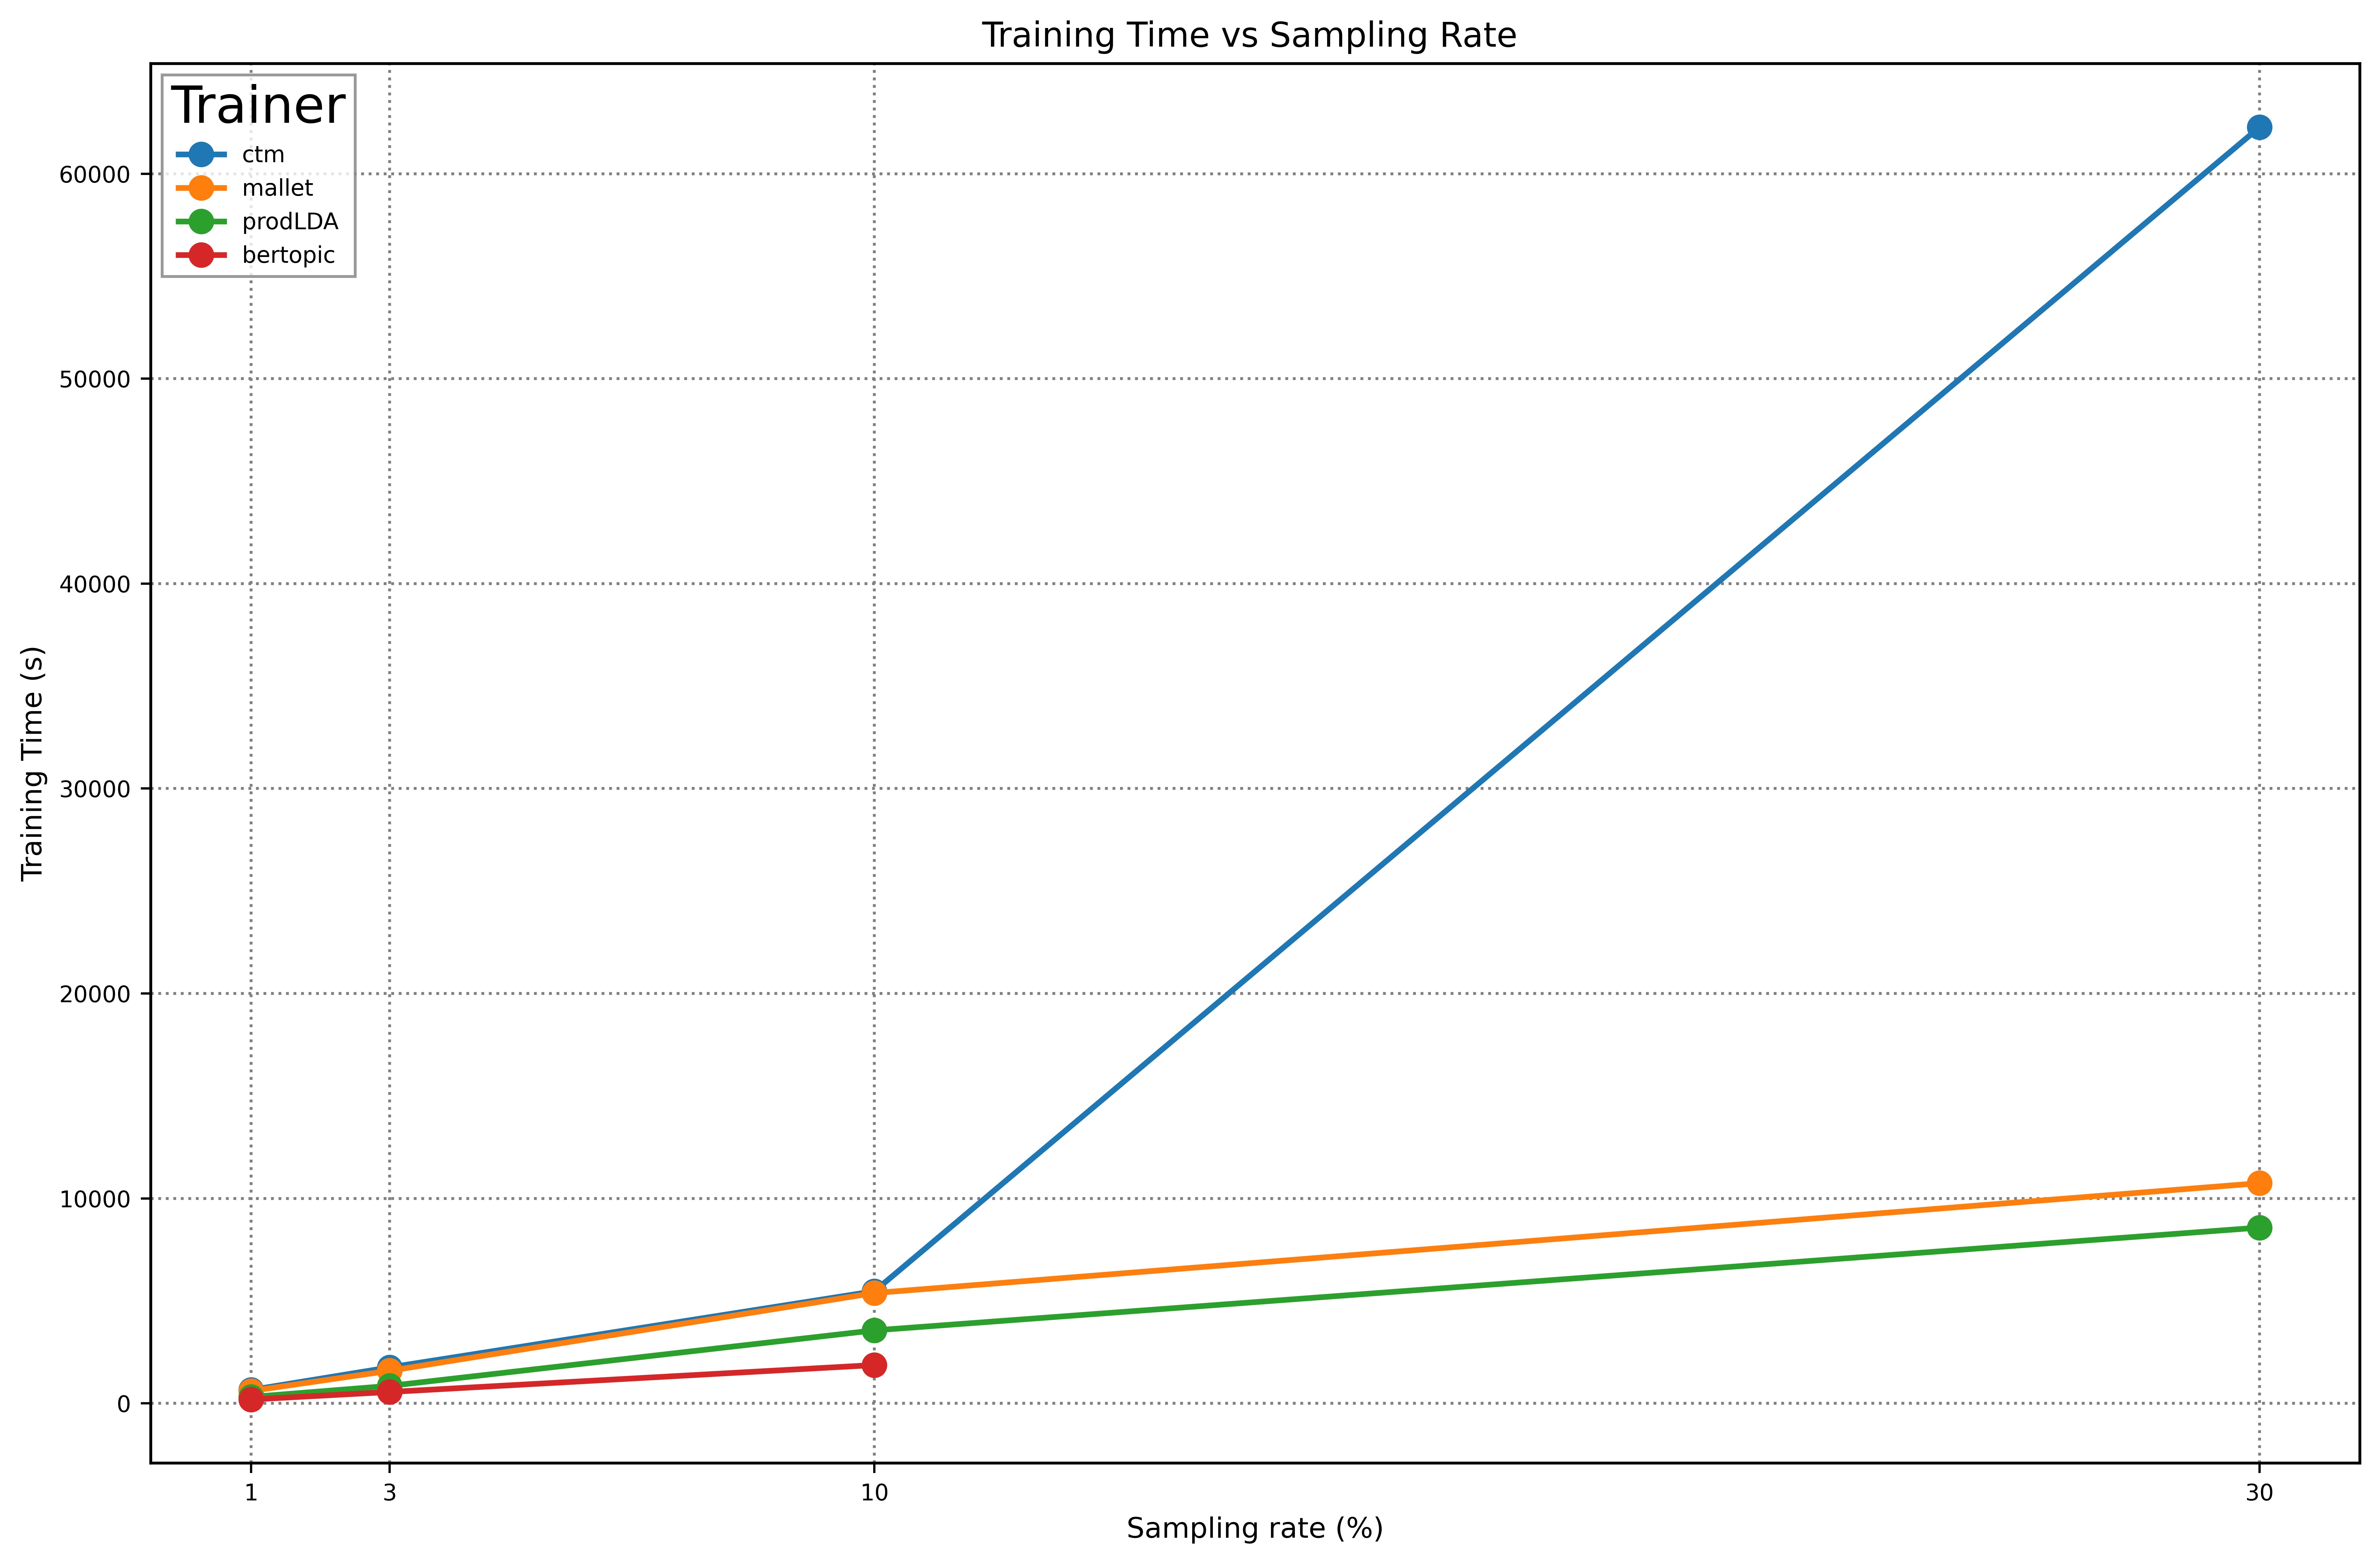

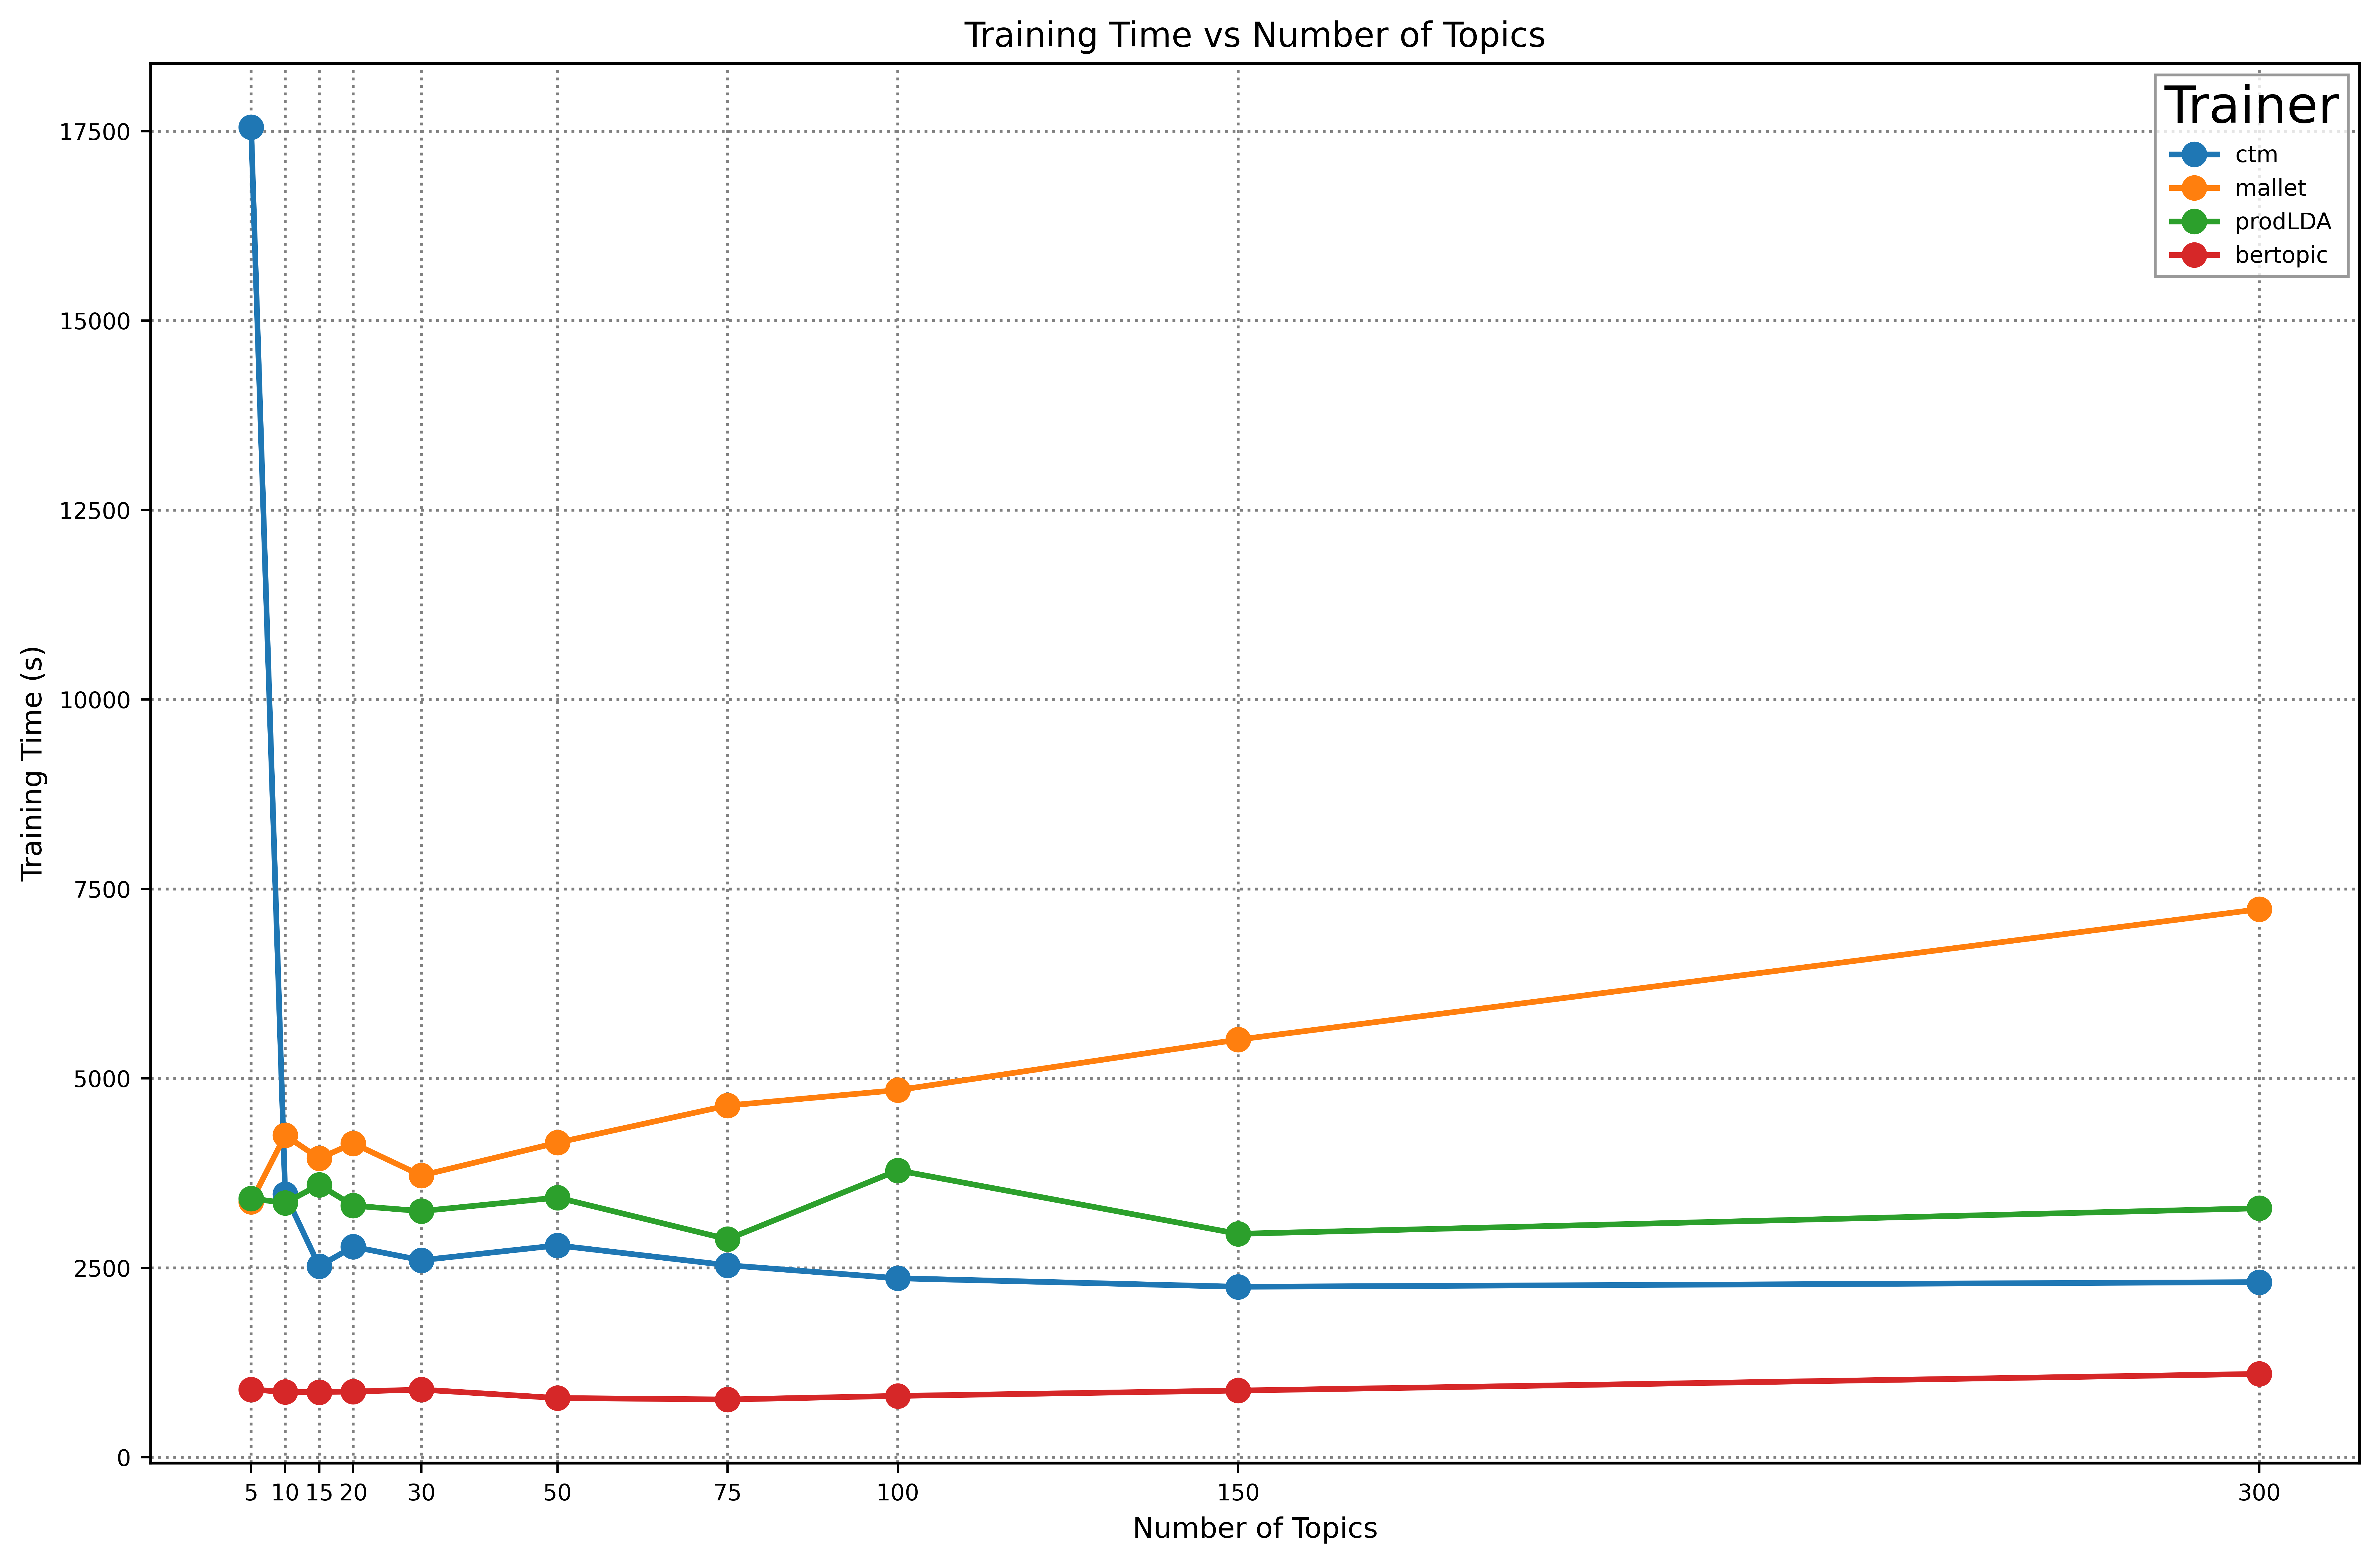

In [183]:
# Plotting the average training time vs sampling rate per model type (trainer)
plt.figure(figsize=(12, 8))
for trainer in df['trainer'].unique():
    subset = df[df['trainer'] == trainer]
    avg_tr_time_sampling_rate = subset.groupby('Sampling rate')['tr_time'].mean()
    plt.plot(avg_tr_time_sampling_rate.index, avg_tr_time_sampling_rate,
             marker='o', markersize=8, linestyle='-', label=trainer)

plt.xlabel('Sampling rate (%)')
plt.ylabel('Training Time (s)')
plt.title('Training Time vs Sampling Rate ')
plt.xticks(sorted(df['Sampling rate'].unique()))
plt.legend(title='Trainer')
plt.grid(True)
plt.savefig('/export/usuarios_ml4ds/lbartolome/Repos/intelcomp_repos/topicmodeler/scalability/figures/time_vs_sampling.png')
#plt.show()

# Plotting the average training time vs number of topics per model type (trainer)
plt.figure(figsize=(12, 8))
for trainer in df['trainer'].unique():
    subset = df[df['trainer'] == trainer]
    avg_tr_time_nr_topics = subset.groupby('nr_topics')['tr_time'].mean()
    plt.plot(avg_tr_time_nr_topics.index, avg_tr_time_nr_topics,
             marker='o', markersize=8, linestyle='-', label=trainer)

plt.xlabel('Number of Topics')
plt.ylabel('Training Time (s)')
plt.title('Training Time vs Number of Topics')
plt.xticks(sorted(df['nr_topics'].unique()))
plt.legend(title='Trainer')
plt.grid(True)
plt.savefig('/export/usuarios_ml4ds/lbartolome/Repos/intelcomp_repos/topicmodeler/scalability/figures/time_vs_nrtopics.png')
#plt.show()